# MOwNiT
# Lab3 interpolacja

In [1]:
using Plots
using Polynomials
using DataFrames
using Statistics
using Interpolations

# Zad1

In [2]:
function Counter(X, i, x)
    n = size(X)[1]
    differences = []
    for k=1:n
        if k != i
            append!(differences, x - X[k])
        end
    end
    result = 1
    for diff in differences
        result *= diff
    end
    return result
end

function Denominator(X, i)
    differences = []
    for x in X
        if x != X[i]
            append!(differences, X[i] - x)
        end
    end
    result = 1
    for diff in differences
        result *= diff
    end
    return result
end

function LagrangeInterpolation(X, Y)
    n = size(X)[1]
    
    denominators_arr = [Denominator(X, i) for i=1:n]
    x_interpolation = [x for x=X[1]:0.01:X[n]]
    y_interpolation = []
    for x in x_interpolation
        Counters_arr = []
        for i=1:n
            append!(Counters_arr, Counter(X, i, x))
        end
        y_value = 0
        for i=1:n
            y_value += Y[i] * Counters_arr[i] / denominators_arr[i]
        end
        append!(y_interpolation, y_value)
    end
    return x_interpolation , y_interpolation
end

LagrangeInterpolation (generic function with 1 method)

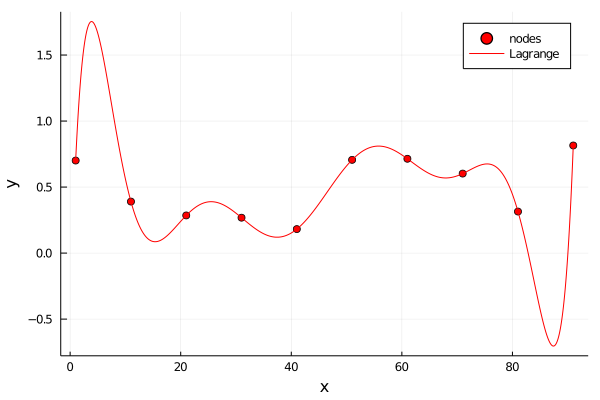

In [3]:
X = 1:10:100
Y = [rand() for x in X]
plot(X, Y, seriestype = :scatter, color = :red, label = "nodes")
plot!(LagrangeInterpolation(X, Y), color = :red, label = "Lagrange", xaxis = "x", yaxis = "y")

# Zad2

In [4]:
struct newt
    NewtonDifferences::Array{Any, 1}   
    X::Array{Float64, 1}
    Y::Array{Float64, 1}
end

In [5]:
function NewtonDifferences(X, Y)
    n = size(X)[1]
    differences = []

    for i=1:n
        for j=1:i
            if j == 1
                push!(differences, [])
                append!(differences[i], Y[i])
            else
                append!(differences[i], (differences[i][j-1] - differences[i-1][j-1]) / (X[i] - X[i-j+1]))
            end     
        end
    end
    return differences
end

function NewtonInterpolation(X, Y)
    return newt(NewtonDifferences(X,Y), X, Y)
end

function Horner_schema_Newton(newt, x)
    NewtonDifferences = newt.NewtonDifferences
    
    X = newt.X
    n = size(X)[1]
    
    value = NewtonDifferences[n][n]
    
    for i=(n-1):-1:1
        value = value * (x - X[i]) + NewtonDifferences[i][i]
    end
    
    return value
end

function N_Interpolation(nodes, Y)
    n = size(nodes)[1]
    x_interpolation = [x for x=nodes[1]:0.01:nodes[n]]
    y_interpolation = []
    
    newt = NewtonInterpolation(nodes, Y)
    
    for x in x_interpolation
        append!(y_interpolation, Horner_schema_Newton(newt, x))
    end
    
    return x_interpolation, y_interpolation
    
end

N_Interpolation (generic function with 1 method)

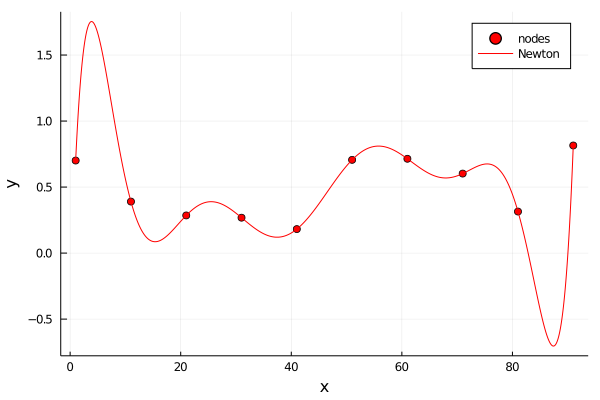

In [6]:
plot(X, Y, seriestype = :scatter, color = :red, label = "nodes")
plot!(N_Interpolation(X,Y), color = :red, label = "Newton", xaxis = "x", yaxis = "y")

# Zad3

In [7]:
function PolynomialInterpolation(X, Y)
    n = size(X)[1]
    itp = fit(X, Y)
    x_interpolation = [i for i=X[1]:0.01:X[n]]
    y_interpolation = []
    for x in x_interpolation
        append!(y_interpolation, itp(x))
    end
    return x_interpolation, y_interpolation
end

PolynomialInterpolation (generic function with 1 method)

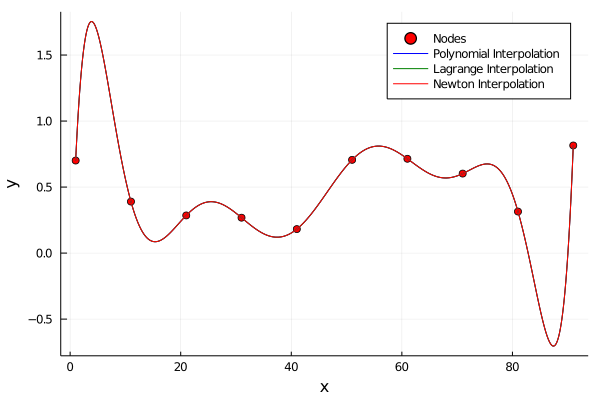

In [8]:
plot(X,Y, color = :red, seriestype = :scatter, label = "Nodes", xaxis = "x", yaxis = "y")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial Interpolation")
plot!(LagrangeInterpolation(X, Y), color = :green , label = "Lagrange Interpolation")
plot!(N_Interpolation(X,Y), color = :red, label = "Newton Interpolation")

# Zad 4

In [9]:
times = []
for j=1:5
    push!(times, [])
    for i=10:10:200
        X = 1:i
        Y = [rand() for x in X]
        for k=1:10
            if j == 1
                append!(times[j], @elapsed PolynomialInterpolation(X,Y))   
            elseif j == 2
                append!(times[j], @elapsed LagrangeInterpolation(X,Y))
            elseif j == 3
                append!(times[j], @elapsed N_Interpolation(X,Y))
            elseif j == 4
                if i == 10 && k == 1
                    push!(times, [])
                end
                newt_obj = NewtonInterpolation(X,Y)
                append!(times[j], @elapsed NewtonInterpolation(X,Y))
                append!(times[j+1], @elapsed [Horner_schema_Newton(newt_obj, x) for x in X[1]:0.01:X[i]])
            elseif j == 5
                if i == 10 && k == 1
                    push!(times, [])
                end
                itp = fit(X,Y)
                append!(times[j+1], @elapsed fit(X,Y))
                append!(times[j+2], @elapsed [itp(x) for x in X[1]:0.01:X[i]])
            end
        end
    end
end

# Polynomials Lagrange Newton Interpolation times

In [10]:
df = DataFrame()
types = ["Polynomials" "Lagrange" "Newton"]
df[:, :Type] = [types[i] for i=1:3 for j=1:200]
df[:, :Size] = [i for j=1:3 for i=10:10:200 for k=1:10]
df[:, :Time] = [times[j][i] for j=1:3 for i=1:200]
df

,Type,Size,Time
,String,Int64,Float64
1,Polynomials,10,0.0516305
2,Polynomials,10,3.9899e-5
3,Polynomials,10,4.21e-5
4,Polynomials,10,3.7999e-5
5,Polynomials,10,3.85e-5
6,Polynomials,10,3.94e-5
7,Polynomials,10,4.15e-5
8,Polynomials,10,4.0401e-5
9,Polynomials,10,3.9599e-5


# Polynomials Newton differences and values times

In [11]:
df_2 = DataFrame()
types_2 = ["Newton" "Polynomials"]
df_2[:, :Type] = [types_2[i] for i=1:2 for j=1:200]
df_2[:, :Size] = [i for j=1:2 for i=10:10:200 for k=1:10]
df_2[:, :Diff_time] = [times[j][i] for j=4:2:6 for i=1:200]
df_2[:, :Val_time] = [times[j][i] for j=5:2:7 for i=1:200]
df_2

,Type,Size,Diff_time,Val_time
,String,Int64,Float64,Float64
1,Newton,10,9.401e-6,0.0661144
2,Newton,10,7.0e-6,0.0013418
3,Newton,10,1.9899e-5,0.0009139
4,Newton,10,7.8e-6,0.0006868
5,Newton,10,7.0e-6,0.0008901
6,Newton,10,1.34e-5,0.0015347
7,Newton,10,1.78e-5,0.0011571
8,Newton,10,1.26e-5,0.000799101
9,Newton,10,6.7e-6,0.0005472


# Statistics

In [12]:
df_grouped = groupby(df, [:Type, :Size])
df_stats = combine(df_grouped, "Time" => mean, "Time" => std)

,Type,Size,Time_mean,Time_std
,String,Int64,Float64,Float64
1,Polynomials,10,0.00519923,0.0163143
2,Polynomials,20,9.71702e-5,4.30887e-6
3,Polynomials,30,0.00016555,1.00226e-5
4,Polynomials,40,0.00030051,9.56702e-6
5,Polynomials,50,0.00053536,0.000217286
6,Polynomials,60,0.00164456,0.00326946
7,Polynomials,70,0.0006678,2.49893e-5
8,Polynomials,80,0.00095037,0.000241634
9,Polynomials,90,0.00112235,4.95579e-5


In [13]:
df_2_grouped = groupby(df_2, [:Type, :Size])
df_2_stats = combine(df_2_grouped, "Diff_time"=>mean , "Val_time"=>mean, "Diff_time"=>std, "Val_time"=>std)

,Type,Size,Diff_time_mean,Val_time_mean,Diff_time_std,Val_time_std
,String,Int64,Float64,Float64,Float64,Float64
1,Newton,10,1.086e-5,0.00745202,4.86305e-6,0.0206145
2,Newton,20,3.38302e-5,0.00841155,1.58116e-5,0.0166526
3,Newton,30,7.03202e-5,0.00764831,2.17668e-5,0.00163696
4,Newton,40,0.00010556,0.0183793,2.83474e-5,0.0163522
5,Newton,50,0.0001492,0.030695,1.33675e-5,0.021512
6,Newton,60,0.0002867,0.0419408,0.000103973,0.019774
7,Newton,70,0.00040598,0.0557511,0.000153489,0.0203899
8,Newton,80,0.00054653,0.0816488,0.000327804,0.0277105
9,Newton,90,0.00056728,0.0930716,0.000178611,0.0288786


# Plots

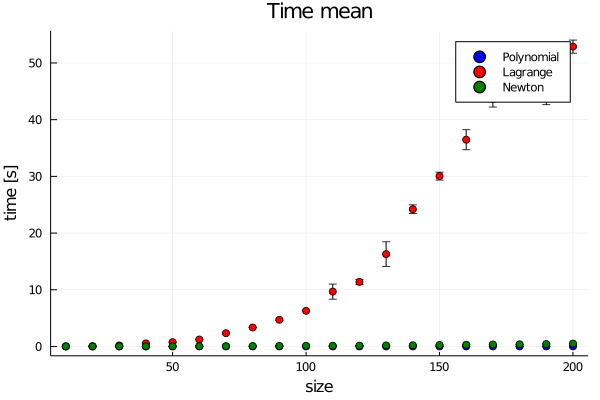

In [14]:
df_polynomials = df_stats[1:20, :]
df_lagrange = df_stats[21:40, :]
df_newton = df_stats[41:60, :]
plot(df_polynomials.Size, df_polynomials.Time_mean, colour = :blue,label="Polynomial",
    yerr=df_polynomials.Time_std, seriestype=:scatter,ylabel = "time [s]",xlabel = "size", layout = 1)

plot!(df_lagrange.Size, df_lagrange.Time_mean, colour = :red,label="Lagrange",
    yerr=df_lagrange.Time_std,seriestype=:scatter,ylabel = "time [s]",xlabel = "size", layout = 1)

plot!(df_newton.Size, df_newton.Time_mean, colour = :green, title="Time mean",label="Newton",
    yerr=df_newton.Time_std,seriestype=:scatter,ylabel = "time [s]",xlabel = "size", layout = 1)

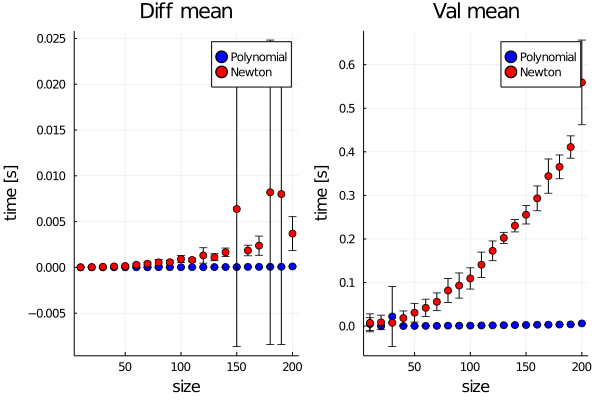

In [15]:
df_2_polynomials = df_2_stats[21:40, :]
df_2_newton = df_2_stats[1:20, :]

plot(df_2_polynomials.Size, df_2_polynomials.Diff_time_mean, colour = :blue,label="Polynomial",
    yerr=df_2_polynomials.Diff_time_std, seriestype=:scatter, layout = 1)

p1 = plot!(df_2_newton.Size, df_2_newton.Diff_time_mean, colour = :red, title="Diff mean",label="Newton",
    yerr=df_2_newton.Diff_time_std,seriestype=:scatter, layout = 1)

plot(df_2_polynomials.Size, df_2_polynomials.Val_time_mean, colour = :blue,label="Polynomial",
    yerr=df_2_polynomials.Val_time_std, seriestype=:scatter, layout = 1)

p2 = plot!(df_2_newton.Size, df_2_newton.Val_time_mean, colour = :red, title="Val mean",label="Newton",
    yerr=df_2_newton.Val_time_std,seriestype=:scatter, layout = 1)

plot(p1, p2, ylabel = ["time [s]" "time [s]"],xlabel = ["size" "size"],
    layout = 2)

# Zad5 Neville's algorithm

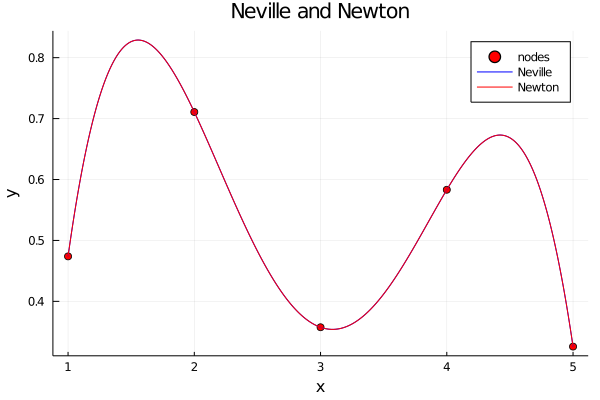

In [16]:
function neville_polynomial_value(X,Y,x)
    n = size(X)[1]
    t = []
    
    for i = 1:n
        push!(t, [])
        append!(t[i], Y[i])
    end
    for i = 2:n
        for j =2:i
            append!(t[i], ((x - X[i-j+1])*t[i][j-1] - (x - X[i])*t[i-1][j-1]) / (X[i] - X[i-j+1]))
        end
    end
    return t[n][n]
end

function neville_algorithm(X,Y)
    n = size(X)[1]
    x_interpolation = [x for x=X[1]:0.01:X[n]]
    y_interpolation = []
    for x in x_interpolation
        append!(y_interpolation, neville_polynomial_value(X,Y,x))
    end
    return x_interpolation, y_interpolation
end

X = [i for i=1:5]
Y = [rand() for x in X]

plot(X, Y, seriestype = :scatter, color = :red, label = "nodes")
plot!(neville_algorithm(X,Y), color = :blue, label = "Neville")
plot!(N_Interpolation(X,Y), color = :red, label = "Newton", xaxis = "x", yaxis = "y", title = "Neville and Newton")

In [17]:
x_neville, y_neville = neville_algorithm(X,Y)
x_newton, y_newton = N_Interpolation(X,Y)
df = DataFrame()
df[:, :x] = [x for x in x_neville]
df[:, :y_neville] = y_neville
df[:, :y_newton] = y_newton
df

,x,y_neville,y_newton
,Float64,Any,Any
1,1.0,0.473817,0.473817
2,1.01,0.488426,0.488426
3,1.02,0.502658,0.502658
4,1.03,0.516519,0.516519
5,1.04,0.530013,0.530013
6,1.05,0.543145,0.543145
7,1.06,0.555918,0.555918
8,1.07,0.568337,0.568337
9,1.08,0.580407,0.580407


# Zad6

# Bspline Constant and Polynomial

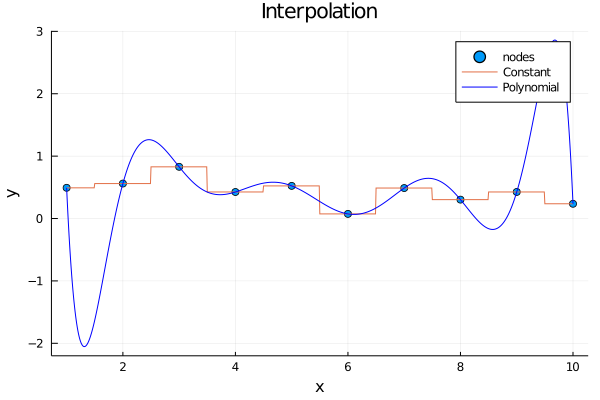

In [18]:
X = 1:10
Y = [rand() for x in X]
x_itp = X[1]:0.01:X[10]

itp = interpolate(Y, BSpline(Constant()))
y1= [itp(x) for x in x_itp]

plot(X, Y, seriestype=:scatter, label="nodes")
plot!(x_itp, y1, label="Constant")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial", title = "Interpolation", xaxis = "x",yaxis="y" )

# Bspline Linear and Polynomial

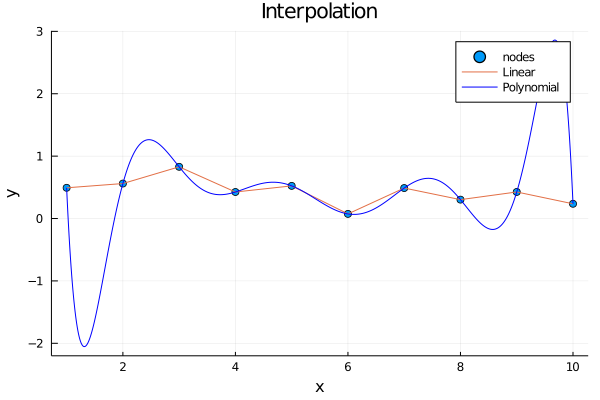

In [19]:
itp = interpolate(Y, BSpline(Linear()))
y1= [itp(x) for x in x_itp]

plot(X, Y, seriestype=:scatter, label="nodes")
plot!(x_itp, y1, label="Linear")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial", title = "Interpolation", xaxis = "x",yaxis="y" )

# Bspline Quadratic and Polynomial

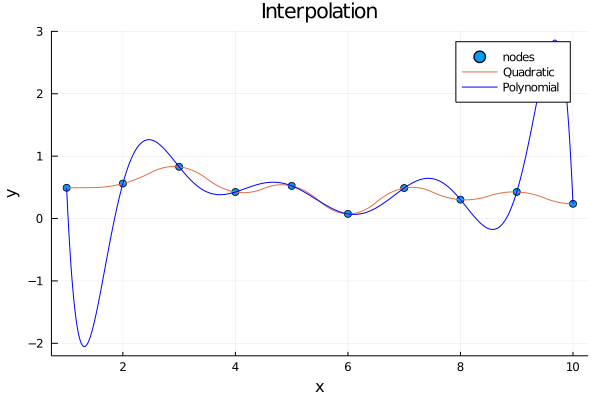

In [20]:
itp = interpolate(Y, BSpline(Quadratic(Flat(OnGrid()))))
y1= [itp(x) for x in x_itp]

plot(X, Y, seriestype=:scatter, label="nodes")
plot!(x_itp, y1, label="Quadratic")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial", title = "Interpolation", xaxis = "x",yaxis="y" )

# BSpline Cubic and Polynomial

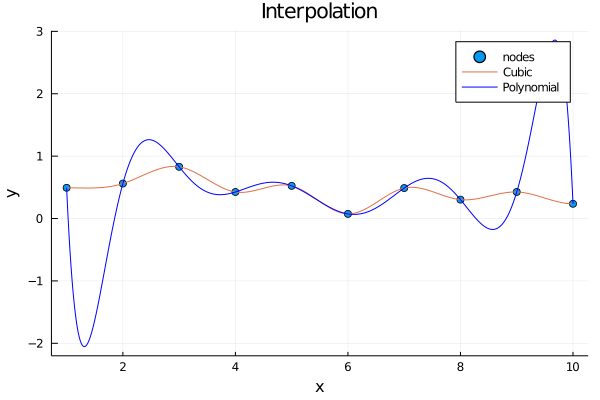

In [21]:
itp = interpolate(Y, BSpline(Cubic(Flat(OnGrid()))))
y1= [itp(x) for x in x_itp]

plot(X, Y, seriestype=:scatter, label="nodes")
plot!(x_itp, y1, label="Cubic")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial", title = "Interpolation", xaxis = "x",yaxis="y" )

# Quadratic and Cubic

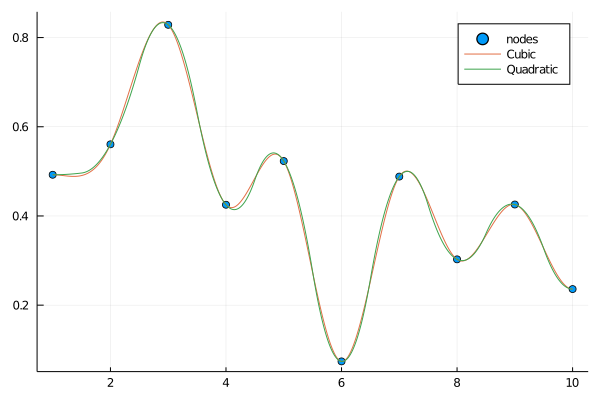

In [22]:
plot(X, Y, seriestype=:scatter, label="nodes")
itp = interpolate(Y, BSpline(Cubic(Flat(OnGrid()))))
y1= [itp(x) for x in x_itp]
plot!(x_itp, y1, label="Cubic")
itp = interpolate(Y, BSpline(Quadratic(Flat(OnGrid()))))
y1= [itp(x) for x in x_itp]
plot!(x_itp, y1, label="Quadratic")

# Efekt Rungego

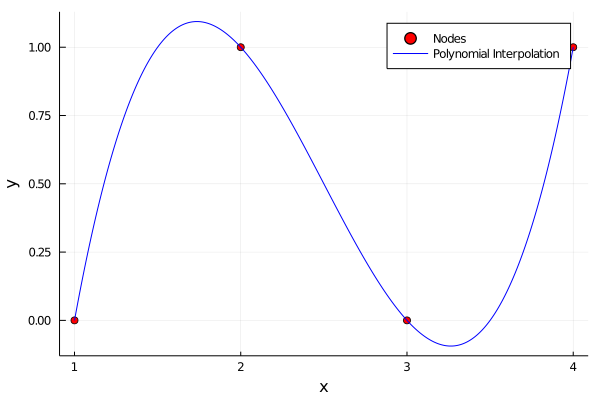

In [23]:
X = [i for i=1:4]
Y = [rand(0:1) for x in X]
plot(X,Y, color = :red, seriestype = :scatter, label = "Nodes", xaxis = "x", yaxis = "y")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial Interpolation")

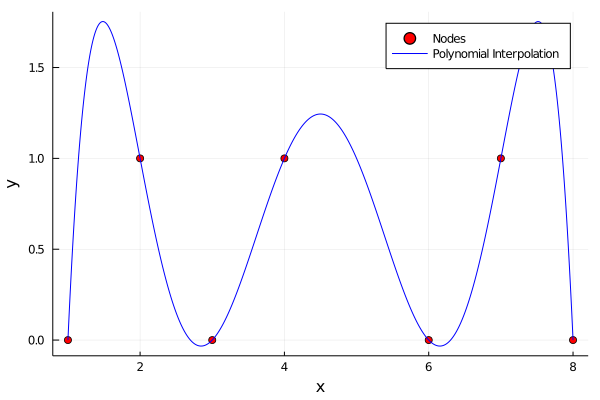

In [24]:
append!(X, [6 7 8])
append!(Y, [rand(0:1) rand(0:1) rand(0:1)])
plot(X,Y, color = :red, seriestype = :scatter, label = "Nodes", xaxis = "x", yaxis = "y")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial Interpolation")

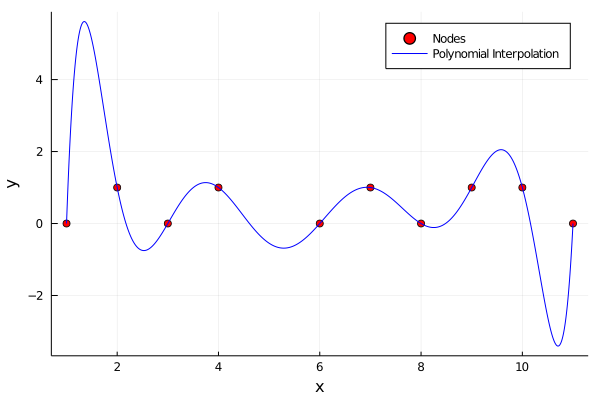

In [25]:
append!(X, [9 10 11])
append!(Y, [rand(0:1) rand(0:1) rand(0:1)])
plot(X,Y, color = :red, seriestype = :scatter, label = "Nodes", xaxis = "x", yaxis = "y")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial Interpolation")

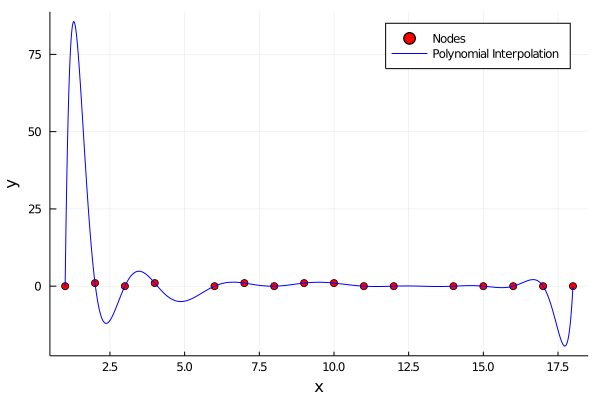

In [26]:
append!(X, [12 14 15 16 17 18])
append!(Y, [rand(0:1) rand(0:1) rand(0:1)])
append!(Y, [rand(0:1) rand(0:1) rand(0:1)])
plot(X,Y, color = :red, seriestype = :scatter, label = "Nodes", xaxis = "x", yaxis = "y")
plot!(PolynomialInterpolation(X,Y), color = :blue, label = "Polynomial Interpolation")